# Portugal Forest Fire Analysis

#### Setup

In [1]:
%pip install pandas matplotlib numpy scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


## About the Data.

The forestfires.csv data set was found on kaggle.com [link](https://www.kaggle.com/datasets/ishandutta/forest-fires-data-set-portugal/data)

The data set contains information about 517 different forest fires in northeastern portugal. The columns are as follows
1. X - An X coordinate location of the fire on the Montesohino map
1. Y - A Y coordinate for the location of the fires
1. Month - the 3 letter month that the fire started on.
1. Day - the day of the week that the fire started on.
1. FFMC - The Fine Fuel Moisture Code from the Canadian Forest Fire Weather Index (FWI)
1. DMC - The Duff Moisture Code from the FWI
1. DC - The Drought Code from the FWI
1. ISI - The Initial Spread Index from the FWI
1. Temp - Temperature In Celsius 
1. RH - Relative Humidity as a %
1. Wind - The wind speed in km/h
1. Rain - the amount of rain recorded in mm/m^2
1. Area - the area in hectare of the fire.

#### Import Data

In [2]:
import pandas as pd
import numpy as np
path_to_data = 'forestfires.csv'
fire_data = pd.read_csv(path_to_data)

#### Clean data

In [3]:
#Columnwise data types, null count, and na count

In [4]:
print('Dtypes:', fire_data.dtypes)
print('************************************')
print('Null Count:',fire_data.isnull().sum())
print('************************************')
print('NA Count:', fire_data.isna().sum())

Dtypes: X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object
************************************
Null Count: X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
************************************
NA Count: X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [5]:
#Drop X, Y, Month, and Day columns
fire_data.drop(['X', 'Y', 'month', 'day'], axis=1, inplace=True)

# Exploration

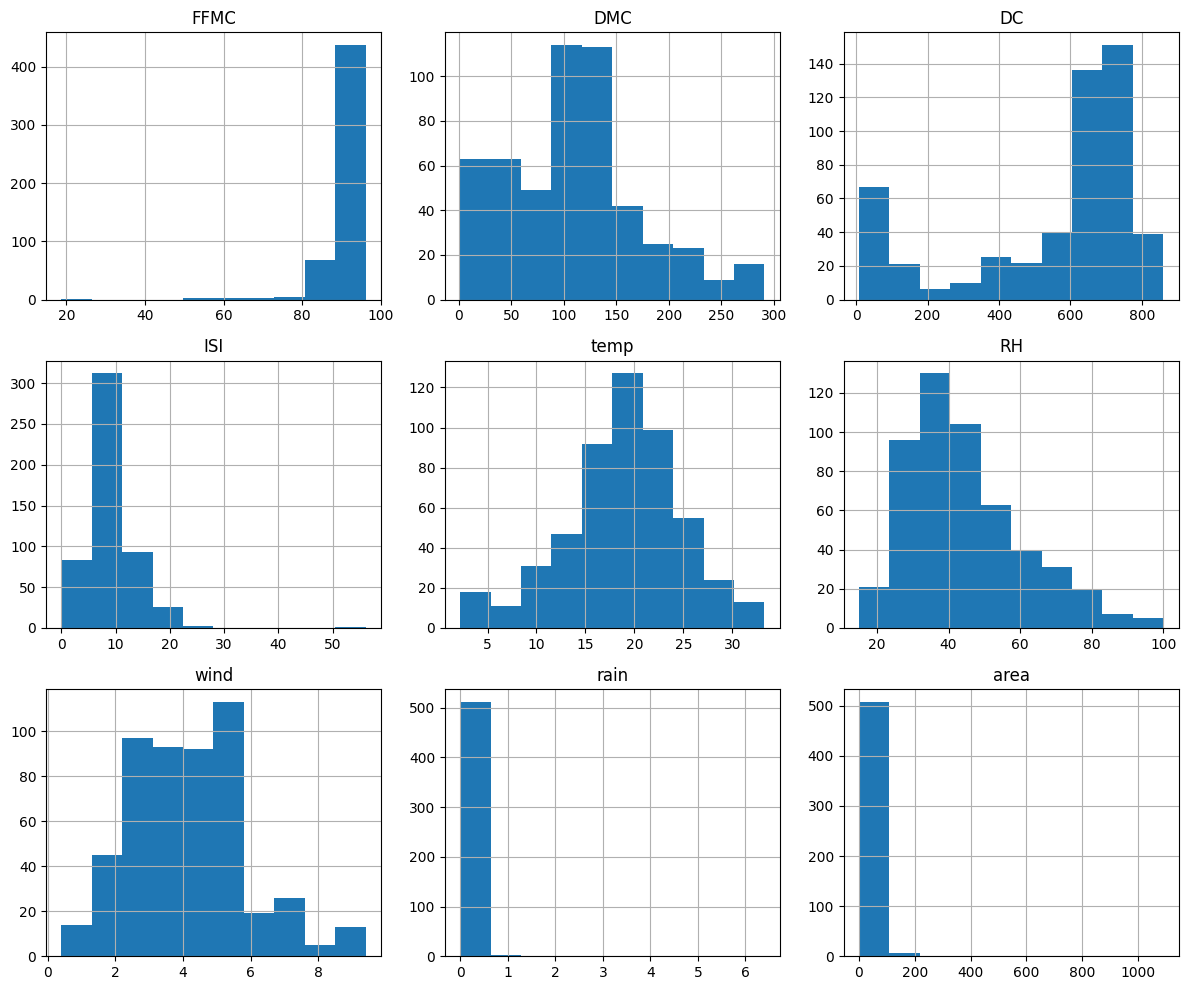

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fire_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

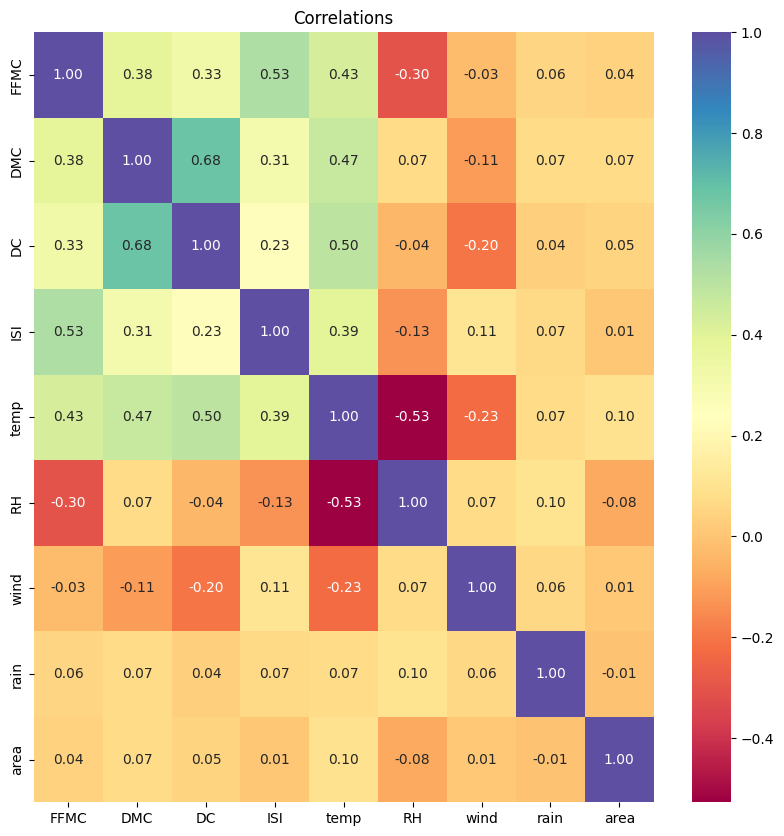

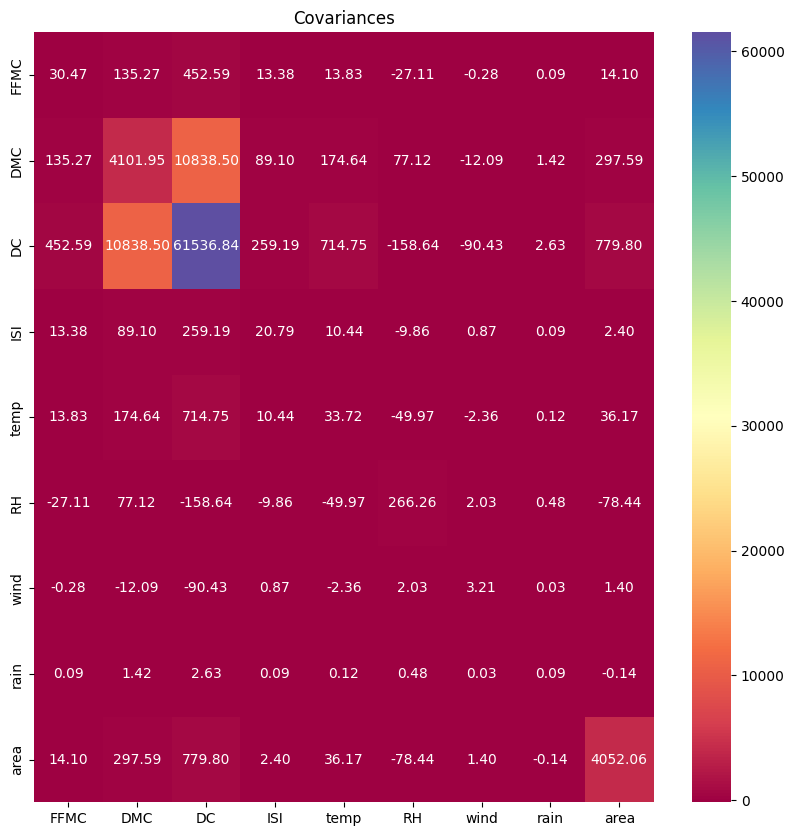

In [7]:


#Correlation matrix
corr = fire_data.corr()
plt.figure(figsize = (10 , 10))
plt.title('Correlations')
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'Spectral')
plt.show()

#Covariance matrix
plt.figure(figsize = (10 , 10))
plt.title('Covariances')
cov = fire_data.cov()
sns.heatmap(cov, annot = True, fmt = '.2f', cmap = 'Spectral')
plt.show()


# F-Test Regression

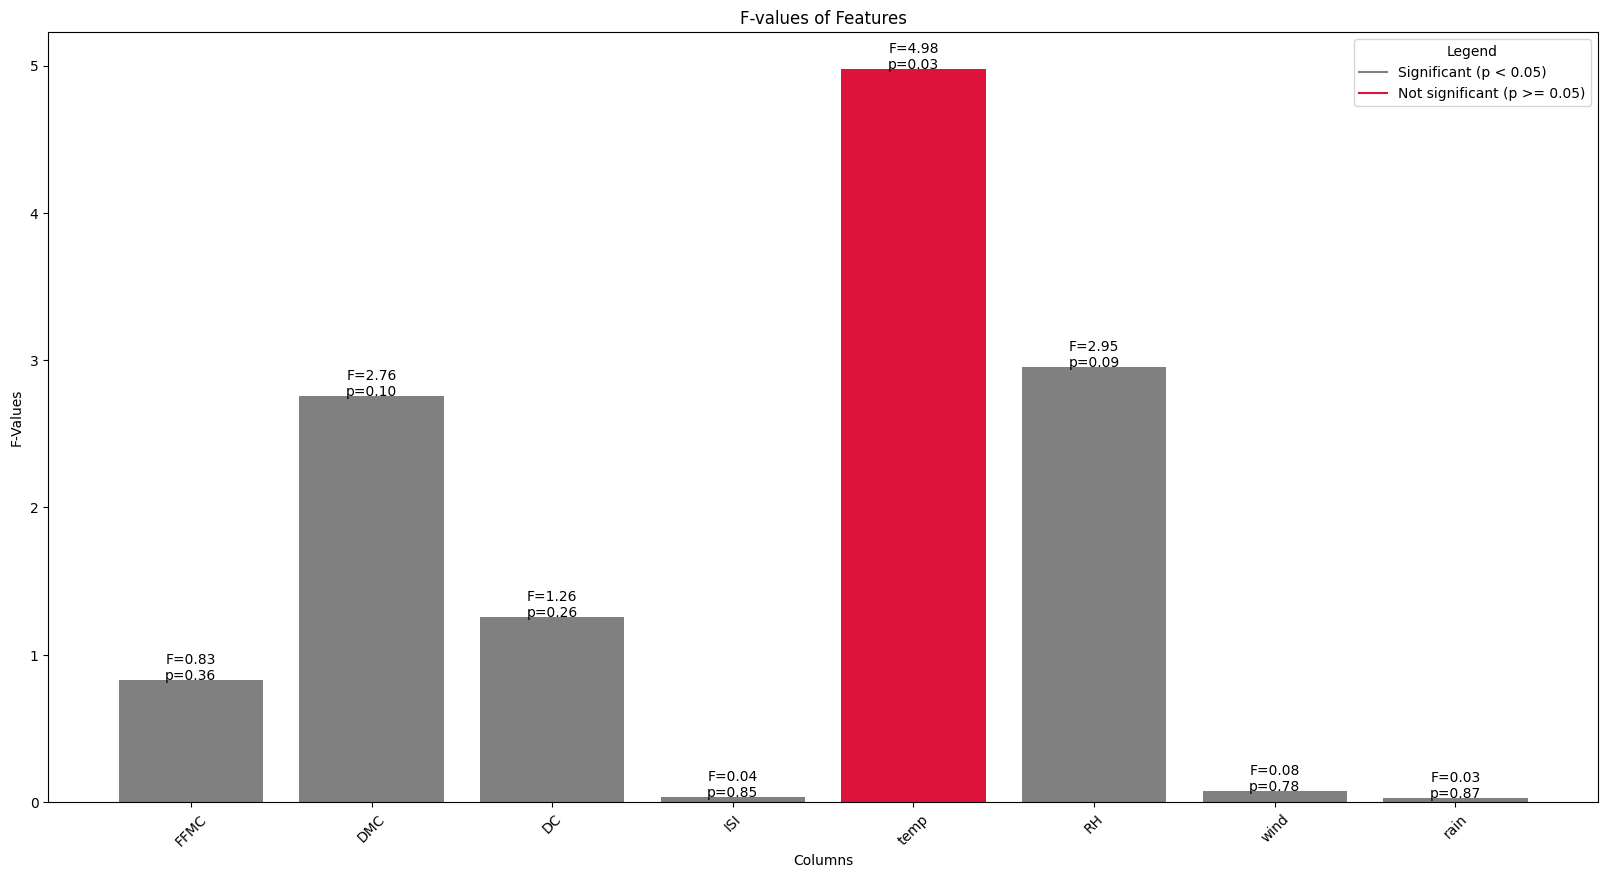

In [9]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

#set dependent and independent vars
X = fire_data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
Y = fire_data['area'] 

#standardize X

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = scaled_features

#perform regression
f_vals, p_vals = f_regression(X, Y)

#bar plot for f_vals and p_vals to show feature importance
plt.figure(figsize=(20, 10))
colors = ['crimson' if p < 0.05 else 'grey' for p in p_vals]  # Green if significant, red otherwise
bars = plt.bar(range(X.shape[1]), f_vals, color=colors, tick_label=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('F-Values')
plt.title('F-values of Features')

#f-vals and p vals as text on the bars
for i, (f_val, p_val) in enumerate(zip(f_vals, p_vals)):
    plt.text(i, f_val, f'F={f_val:.2f}\np={p_val:.2f}', ha='center')

#legend
plt.plot([], [], color='grey', label='Significant (p < 0.05)')
plt.plot([], [], color='crimson', label='Not significant (p >= 0.05)')
plt.legend(title='Legend')

plt.show()



#### Linear Regression

In [10]:
#create l-reg model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5, shuffle = True)

lreg = LinearRegression()

scores = cross_val_score(lreg, X, Y, cv = k_folds, scoring = 'r2')

print(f"RMSE scores for each fold: {[f'{score:.2f}' for score in scores]}")
print(f"Average R2: {np.mean(scores):.2f}")

RMSE scores for each fold: ['-0.20', '-0.00', '-0.43', '-0.08', '0.00']
Average R2: -0.14


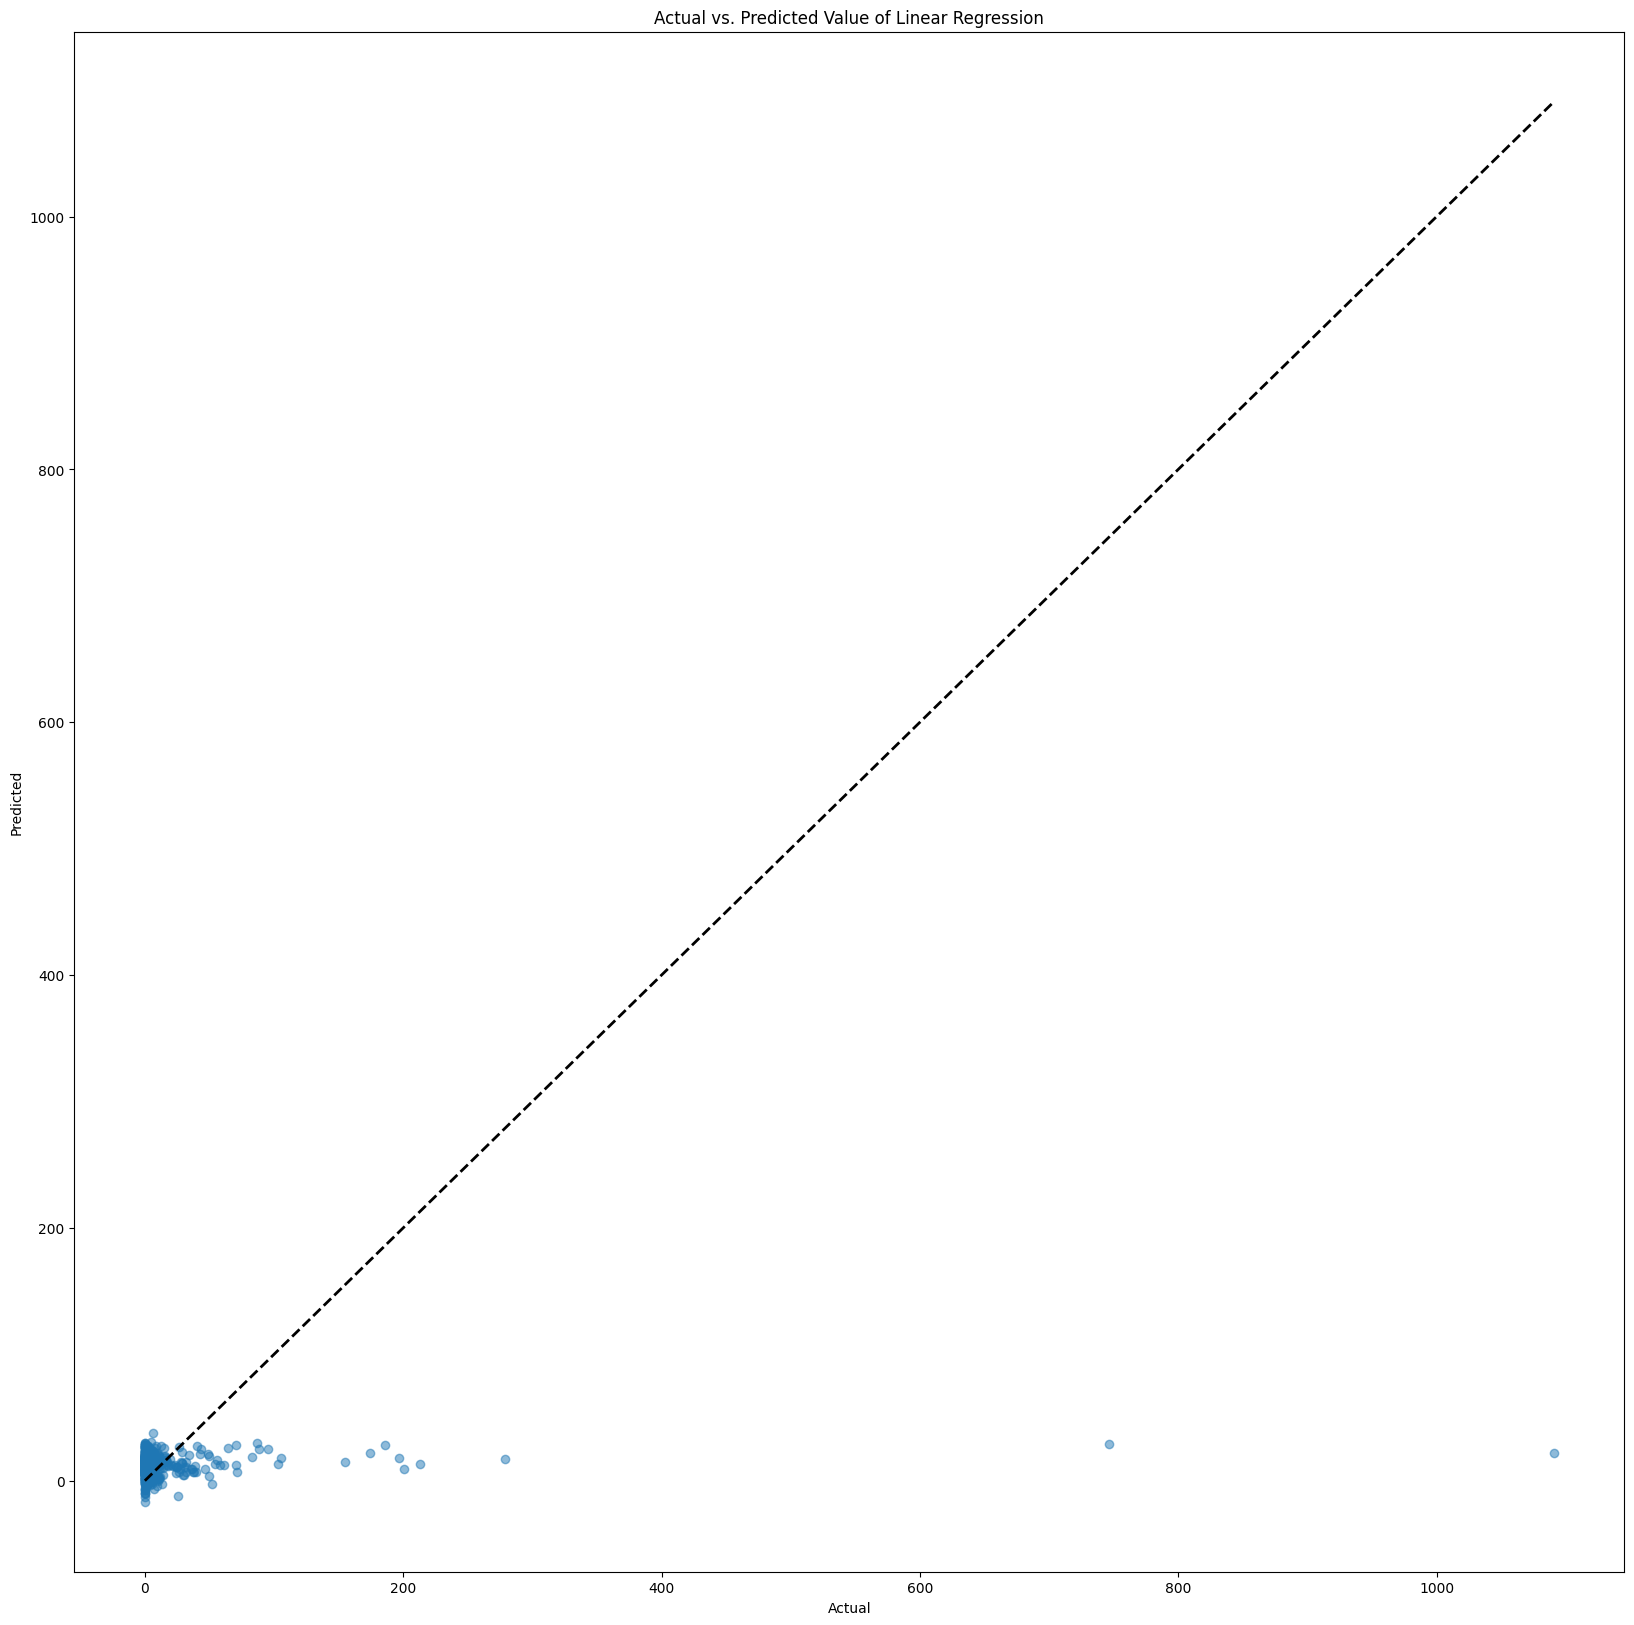

In [11]:
preds = lreg.fit(X, Y).predict(X)

#plot of actual vs predicted
plt.figure(figsize = (20, 20))
plt.scatter(Y, preds, alpha = 0.5)

#perfect fit line
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw = 2)
plt.title('Actual vs. Predicted Value of Linear Regression')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

#### Polynomial

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
# Assuming X and Y are defined and contain your features and target variable respectively
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare to collect the scores
r2_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Predict and evaluate
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    r2_scores.append(r2)

# Calculate average R² across all folds
average_r2 = np.mean(r2_scores)
print(f"Average R²: {average_r2}")

Average R²: -0.08779460435448827


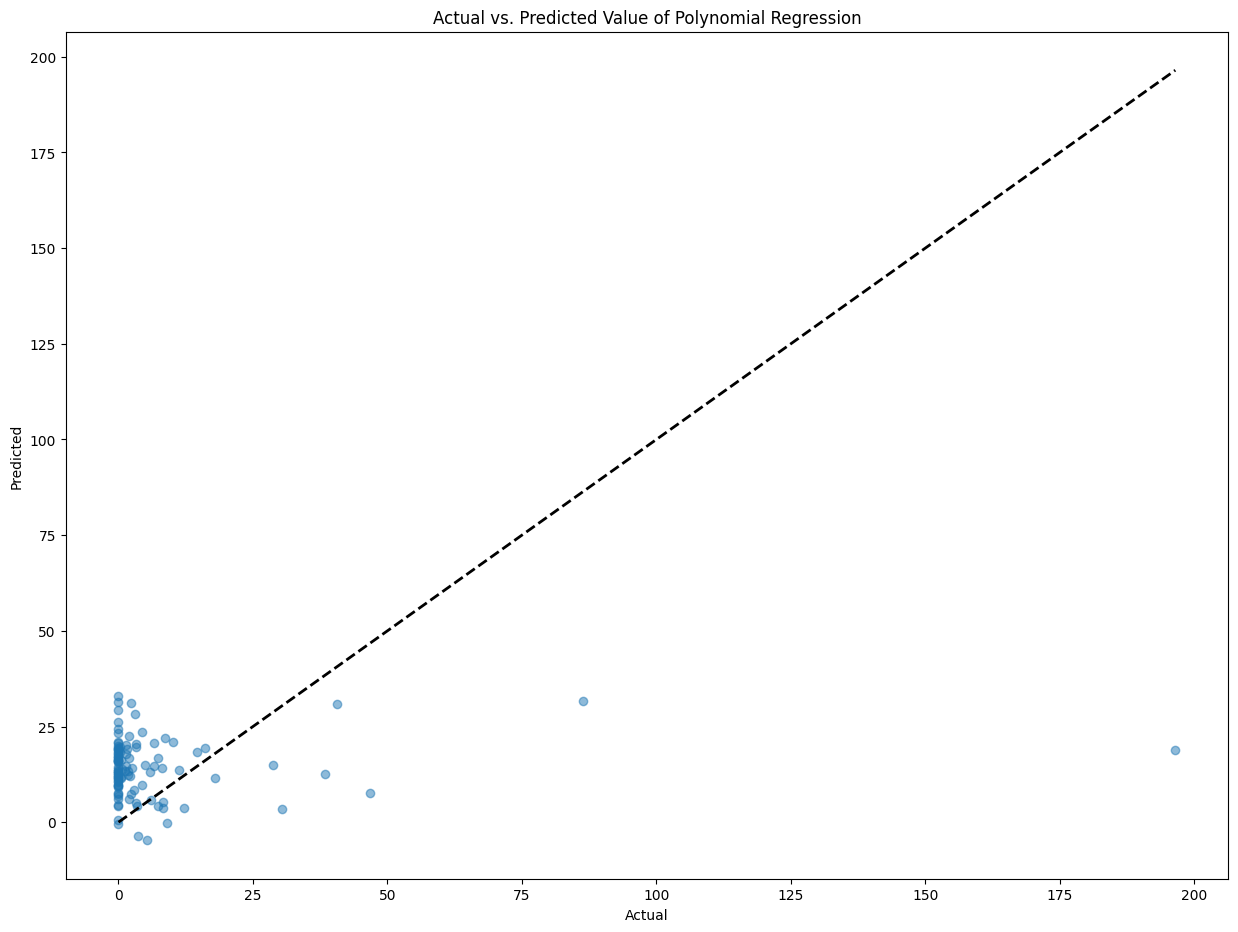

In [15]:
#plot of actual vs predicted
plt.figure(figsize = (15, 11))
plt.scatter(Y_test, Y_pred, alpha = 0.5)

#perfect fit line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw = 2)
plt.title('Actual vs. Predicted Value of Polynomial Regression')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()


#### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

k_folds = KFold(n_splits = 5, shuffle = True)
randfore = RandomForestRegressor(n_estimators = 100) #100 trees
scores = cross_val_score(randfore, X, Y, cv = k_folds, scoring = 'r2')

print(f"RMSE scores for each fold: {[f'{score:.2f}' for score in scores]}")
print(f"Average R2: {np.mean(scores):.2f}")


RMSE scores for each fold: ['-0.15', '-0.93', '-0.11', '-0.24', '0.01']
Average R2: -0.28


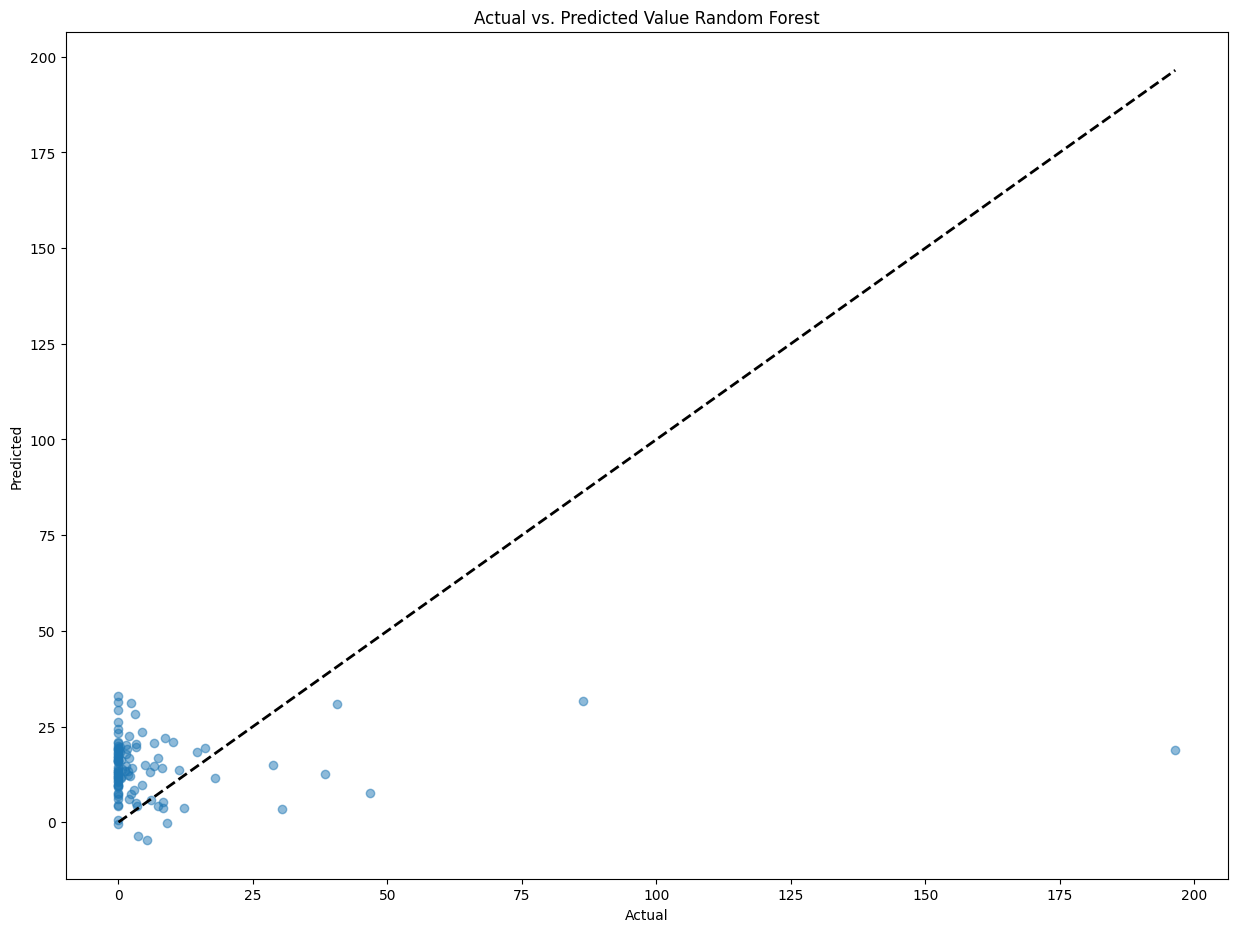

In [18]:
preds = randfore.fit(X, Y).predict(X)

#plot of actual vs predicted
plt.figure(figsize = (15, 11))
plt.scatter(Y_test, Y_pred, alpha = 0.5)

#perfect fit line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw = 2)
plt.title('Actual vs. Predicted Value Random Forest')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()


In [ ]:
#plot tree
from sklearn.tree import plot_tree
randfore.fit(X, Y)
tree = randfore.estimators_[0]



In [ ]:
plt.figure(figsize = (20, 20), dpi = 600)
plot_tree(tree, feature_names = X.columns, filled = True, rounded = True, fontsize = 1)
#plt.savefig('tree_high_res.png', format = 'png')
plt.title('Random Forest Tree')
plt.tight_layout()
plt.show()